Import the data from the learning record and convert it into a pandas dataframe

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib
import matplotlib.pyplot as plt
import os
from mod_relational import *
matplotlib.rcParams['figure.figsize'] = [20,15]
%matplotlib inline



In [2]:
directory = 'Q_Agent'
#r,d,f = (os.walk(directory))

RawData = {}

for r,d,files in os.walk(directory):
    for (i,f) in enumerate(files):
        Data = pickle.load(open(os.path.join(r,f),'rb'))
        reward, mean_reward, reward_std, _, episodes  = Data['LC']
        
        for replicates,ep in zip(reward, episodes):
            for x in replicates:
                RawData[len(RawData)] = [x,ep,'Regular']
                



In [3]:
def ReadLCData(directory, label):
    RawData = {}
    for r,d,files in os.walk(directory):
        for (i,f) in enumerate(files):
            Data = pickle.load(open(os.path.join(r,f),'rb'))
            reward, mean_reward, reward_std, _, episodes = Data['LC']
            
            for replicates, ep in zip(reward, episodes):
                for x in replicates:
                    RawData[len(RawData)] = [x,ep,label,i]
    return pd.DataFrame.from_dict(RawData, orient = 'index', columns = ['Mean Terminal Reward', 'Episode', 'Learning agent','run'])


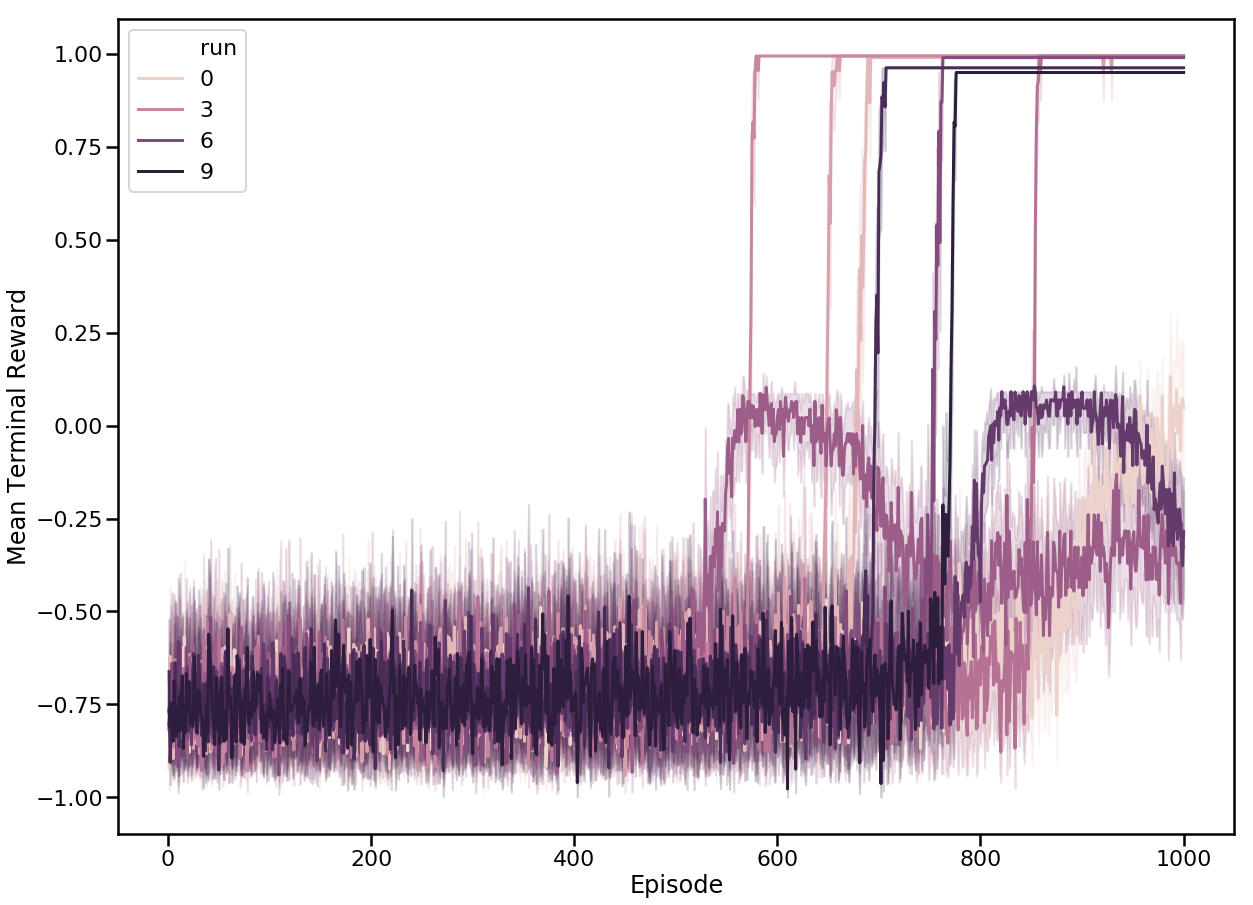

In [17]:
#LCData = pd.DataFrame.from_dict(RawData, orient='index', columns=['Mean Terminal Reward','Episode','Learning agent'])
LCData2 = ReadLCData('Q_Agent','Regular')
sns.set_context('poster')
plt.figure(figsize=(20,15))
sns.lineplot(x='Episode',y='Mean Terminal Reward',data=LCData2, hue='run')

Plotting the median value of the learning curve

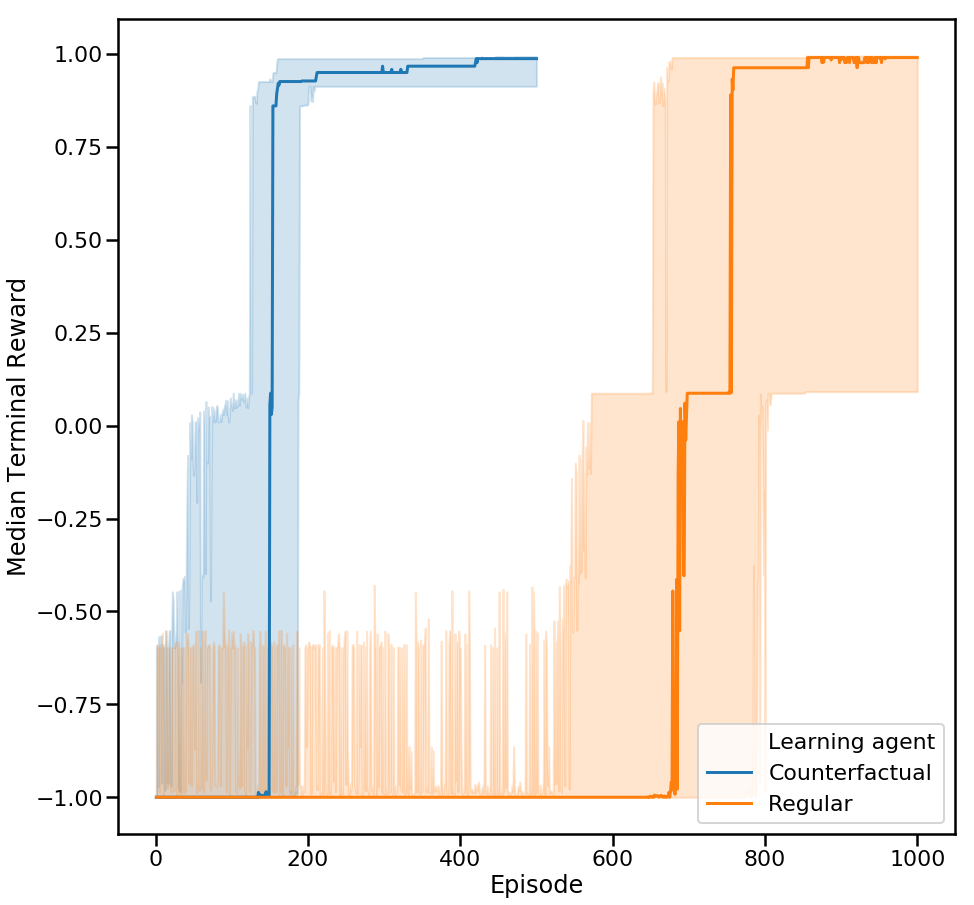

In [31]:
LCData1 = ReadLCData('CFAgent', 'Counterfactual')
LCData2 = ReadLCData('Q_Agent','Regular')
LCData = pd.concat([LCData1, LCData2], axis = 0, ignore_index=True)
sns.set_context('poster')
plt.figure(figsize=(15,15))
lineplot(x='Episode',y='Mean Terminal Reward',data=LCData, hue='Learning agent', ci=50, estimator=pd.np.median)
plt.ylabel('Median Terminal Reward')
f = plt.gcf()
plt.savefig('LearningCurvesDinner.pdf', bbox_inches = 'tight')
#sns.lineplot(x='Episode', y='Mean Terminal Reward', data = LCData, hue='Learning agent',ci=None, style_order=['--','--'])
# plt.figure(figsize=(20,15))
# sns.scatterplot(x='Episode',y='Mean Terminal Reward',data=LCData, hue = 'Learning agent')





Plotting the mean value of the learning curve with the standard deviation

275000


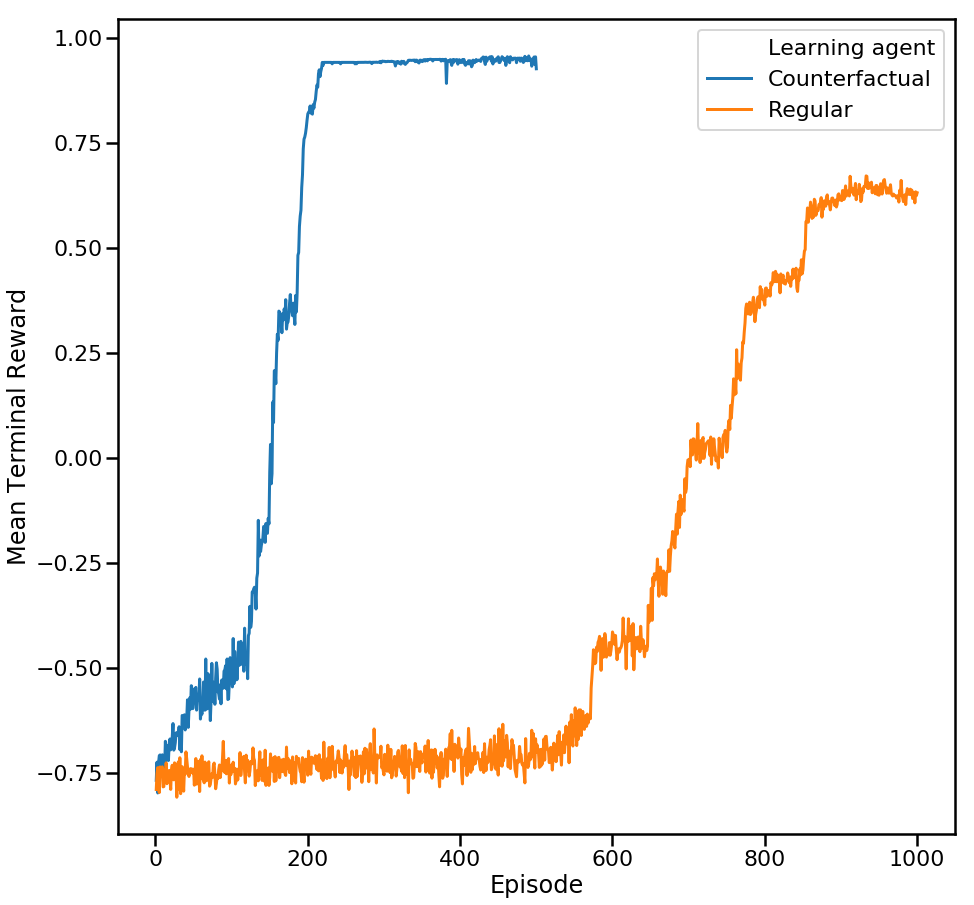

In [32]:
LCData1 = ReadLCData('CFAgent', 'Counterfactual')
LCData2 = ReadLCData('Q_Agent','Regular')
print(len(LCData1))
LCData = pd.concat([LCData1, LCData2], axis = 0, ignore_index=True)
sns.set_context('poster')
plt.figure(figsize=(15,15))
sns.lineplot(x='Episode',y='Mean Terminal Reward',data=LCData, hue='Learning agent', ci=None)
